In [79]:
# World Happiness Report sisselugemine
tee1 = 'C:/Users/Raul/Andmeteadus/Project/2015.csv'
tee2 = 'C:/Users/Raul/Andmeteadus/Project/2016.csv'
tee3 = 'C:/Users/Raul/Andmeteadus/Project/2017.csv'
tee4 = 'C:/Users/Raul/Andmeteadus/Project/2018.csv'
tee5 = 'C:/Users/Raul/Andmeteadus/Project/2019.csv'

import pandas as pd
happy_2015_df = pd.read_csv(tee1)
happy_2016_df = pd.read_csv(tee2)
happy_2017_df = pd.read_csv(tee3)
happy_2018_df = pd.read_csv(tee4)
happy_2019_df = pd.read_csv(tee5)

# Lisame tunnuse "year"
happy_2015_df["year"] = 2015
happy_2016_df["year"] = 2016
happy_2017_df["year"] = 2017
happy_2018_df["year"] = 2018
happy_2019_df["year"] = 2019

In [3]:
# Valime need veerud, mis kõigil olemas on ja paneme need samasse järjekorda.

happy_2015 = happy_2015_df.iloc[:, [0, 2, 3, 5, 7, 8, 9, 10, 12]]
happy_2015.columns = ["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]
#happy_2015

In [4]:
happy_2016 = happy_2016_df.iloc[:, [0, 2, 3, 6, 8, 9, 10, 11, 13]]
happy_2016.columns = ["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]
#happy_2016

In [5]:
happy_2017 = happy_2017_df.iloc[:, [0, 1, 2, 5, 7, 8, 9, 10, 12]]
happy_2017.columns = ["country", "rank", "score", "economy", "health", "freedom", "generosity", "trust", "year"]
happy_2017 = happy_2017[["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]]
#happy_2017

In [6]:
happy_2018 = happy_2018_df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]]
happy_2018.columns = ["rank", "country", "score", "economy", "health", "freedom", "generosity", "trust", "year"]
happy_2018 = happy_2018[["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]]
#happy_2018

In [7]:
happy_2019 = happy_2019_df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]]
happy_2019.columns = ["rank", "country", "score", "economy", "health", "freedom", "generosity", "trust", "year"]
happy_2019 = happy_2019[["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]]
#happy_2019

In [8]:
# Ühendame Happiness andmestikud
happy = pd.concat([happy_2015, happy_2016, happy_2017, happy_2018, happy_2019], axis=0)
happy = happy.reset_index(drop=True) # Ajame indeksid paika
happy

# Uurime riike, mida pole 5
loendus = happy.groupby('country').count()
loendus = loendus["rank"]
loendus = loendus[loendus < 5]
loendus

# Teeme sama nimega need, mis tegelikult on kõigis olemas
happy["country"] = happy["country"].replace("Hong Kong S.A.R., China", "Hong Kong")
happy["country"] = happy["country"].replace("Northern Cyprus", "North Cyprus")
happy["country"] = happy["country"].replace("Taiwan Province of China", "Taiwan")
happy["country"] = happy["country"].replace("Trinidad and Tobago", "Trinidad & Tobago")

# Vaatame uuesti, mis on puudulikud ja eemaldame need andmestikust (Somalia???)
loendus = happy.groupby('country').count()
loendus = loendus["rank"]
loendus = loendus[loendus < 5]
puudulikud = loendus.index.tolist()

happy = happy[~happy['country'].isin(puudulikud)]
happy # Kokku jäi meil 145 riiki, millel on andmed iga aasta kohta.

,country,rank,score,economy,health,freedom,trust,generosity,year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
775,Malawi,150,3.410,0.19100,0.49500,0.44300,0.08900,0.21800,2019
776,Yemen,151,3.380,0.28700,0.46300,0.14300,0.07700,0.10800,2019
777,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019


In [56]:
# Uurime veerge
happy.describe()
happy[happy['trust'].isnull()] # 2018 AÜE trust puudu, asendame 2017 ja 2019 keskmisega
kesk = (float(happy.loc[(happy["country"] == "United Arab Emirates") & (happy["year"] == 2017),"trust"]) + float(happy.loc[(happy["country"] == "United Arab Emirates") & (happy["year"] == 2019),"trust"]))/2
happy.loc[(happy["country"] == "United Arab Emirates") & (happy["year"] == 2018),"trust"] = kesk


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268E25CD4C8>,
      dtype=object)

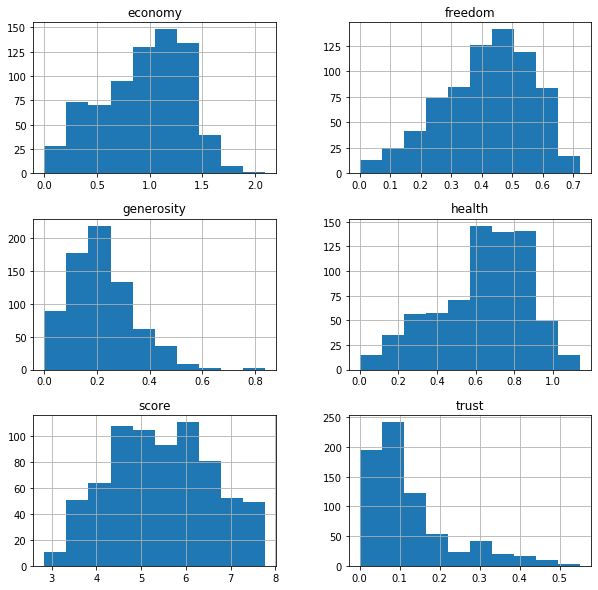

In [55]:
#happy[happy["year"] == 2015].hist(figsize=(15, 10))
happy.iloc[:, [0, 2, 3, 4, 5, 6, 7]].hist(figsize=(10, 10))


In [57]:
happy.iloc[:, [0, 2, 3, 4, 5, 6, 7]].describe()

,score,economy,health,freedom,trust,generosity
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,5.442050,0.943891,0.635260,0.415346,0.124678,0.219106
std,1.118515,0.397239,0.235546,0.148180,0.107150,0.124204
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.553000,0.657000,0.499000,0.312000,0.053000,0.128890
50%,5.430000,1.007610,0.669000,0.434000,0.089000,0.201870
75%,6.293000,1.252785,0.814550,0.531640,0.155000,0.282000
max,7.769000,2.096000,1.141000,0.724000,0.551910,0.838075


In [70]:
# GDPA per capita andmestiku sisselugemine
tee6 = 'C:/Users/Raul/Andmeteadus/Project/ProjectedRealPerCapitaGDPValues.xls'

GDP_df = pd.read_excel(tee6 , sheet_name='Projected Real GDP Per Capita')
#GDP_df

,Country,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2022.1,2023.1,2024.1,2025.1,2026.1,2027.1,2028.1,2029.1,2030.1,2031.1
0,World,9866.764648,10000.176758,10150.637695,10326.331055,10503.276367,10653.253906,10833.008789,11033.803711,11197.676758,...,1.812744,1.772331,1.839343,1.889911,1.823798,1.855941,1.902464,1.948817,1.994163,2.039172
1,World Less USA,8016.582520,8129.176270,8268.252930,8419.086914,8560.382812,8703.264648,8868.720703,9033.705078,9159.820312,...,2.094676,2.034146,2.078321,2.102456,2.024703,2.056661,2.107118,2.157367,2.207364,2.256200
2,North America,48793.160156,49502.500000,50087.113281,50954.785156,51941.054688,52443.046875,53255.308594,54328.769531,55324.335938,...,1.016675,1.028773,1.150103,1.272257,1.240246,1.259609,1.277416,1.295414,1.309648,1.327174
3,Canada,48901.714844,49364.355469,50193.753906,51231.992188,51354.109375,51692.875000,52878.199219,53484.242188,53825.738281,...,1.234937,1.255647,1.276777,1.299116,1.321618,1.343037,1.363522,1.382981,1.402302,1.424143
4,United States,48781.324219,49517.570312,50075.472656,50924.511719,52005.167969,52525.148438,53296.578125,54421.187500,55380.246094,...,0.993348,1.004461,1.136446,1.269252,1.231390,1.250525,1.268037,1.285902,1.299587,1.316652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,NAFTA,38943.480469,39480.222656,39875.320312,40523.933594,41275.113281,41645.585938,42240.460938,43030.066406,43724.996094,...,0.985103,1.001782,1.118549,1.237631,1.212814,1.235859,1.257325,1.278857,1.296802,1.317273
228,Europe & Central Asia,25058.439453,25026.888672,25103.705078,25481.210938,25890.863281,26308.628906,26886.021484,27391.298828,27756.191406,...,1.543229,1.466791,1.424737,1.378939,1.346350,1.337108,1.355697,1.372846,1.388631,1.403777
229,Middle East & North Africa,7851.805176,7988.766113,8129.943848,8250.334961,8372.794922,8591.066406,8575.352539,8582.842773,8471.797852,...,1.617944,1.749273,1.849359,1.816100,1.809720,1.778853,1.826224,1.871122,1.913694,1.952352
230,Other Southeast Asia Outlook,3354.945312,3528.085693,3647.909668,3759.339600,3896.592773,4039.044189,4217.534668,4391.443359,4553.481934,...,3.685661,3.622342,3.564475,3.488760,3.467411,3.470009,3.500602,3.531367,3.561924,3.592258


In [76]:
riigid = happy["country"].unique().tolist()
GDP = GDP_df[GDP_df['Country'].isin(riigid)] # Valime välja vaid happiness reportis esinevad riigid
GDP = GDP.iloc[:,[0, 5,6,7,8,9]]
GDP

,Country,2015,2016,2017,2018,2019
3,Canada,51354.109375,51692.875000,52878.199219,53484.242188,53825.738281
4,United States,52005.167969,52525.148438,53296.578125,54421.187500,55380.246094
7,Mexico,10047.209961,10218.336914,10309.086914,10399.106445,10343.576172
13,Costa Rica,9283.854492,9562.051758,9760.123047,9905.846680,10053.239258
15,Dominican Republic,6578.867676,6929.162109,7536.377930,7979.916992,8336.320312
...,...,...,...,...,...,...
206,Mauritius,8930.475586,9215.345703,9509.773438,9811.546875,10118.019531
210,Rwanda,730.225586,758.713989,784.616150,832.652344,871.358826
215,Tanzania,853.806335,887.457886,921.888000,943.584595,974.751526
216,Uganda,659.463257,669.037720,672.916260,691.467224,709.582275


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268E2B5AFC8>,
      dtype=object)

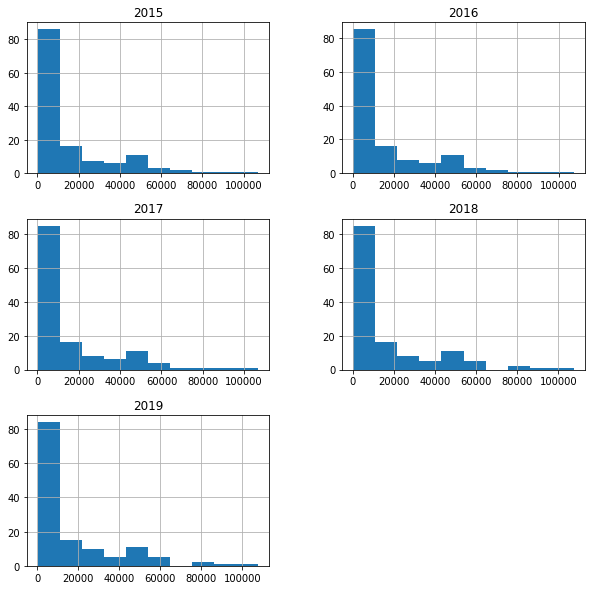

In [78]:
GDP.hist(figsize=(10, 10))